In [17]:
import cv2
import numpy as np

In [25]:
target = 3
data_name = ['0618', '0854', '1066'][target - 1]

img = cv2.imread(f'../input_data/{data_name}.png')
print(img.shape)

hog = cv2.HOGDescriptor()
hog_features = hog.compute(img)
print(hog_features.shape)
np.save(f'./Features/{data_name}_hog_featuers.npy', hog_features)

(250, 500, 3)
(3326400,)


ValueError: weights should have the same shape as a.

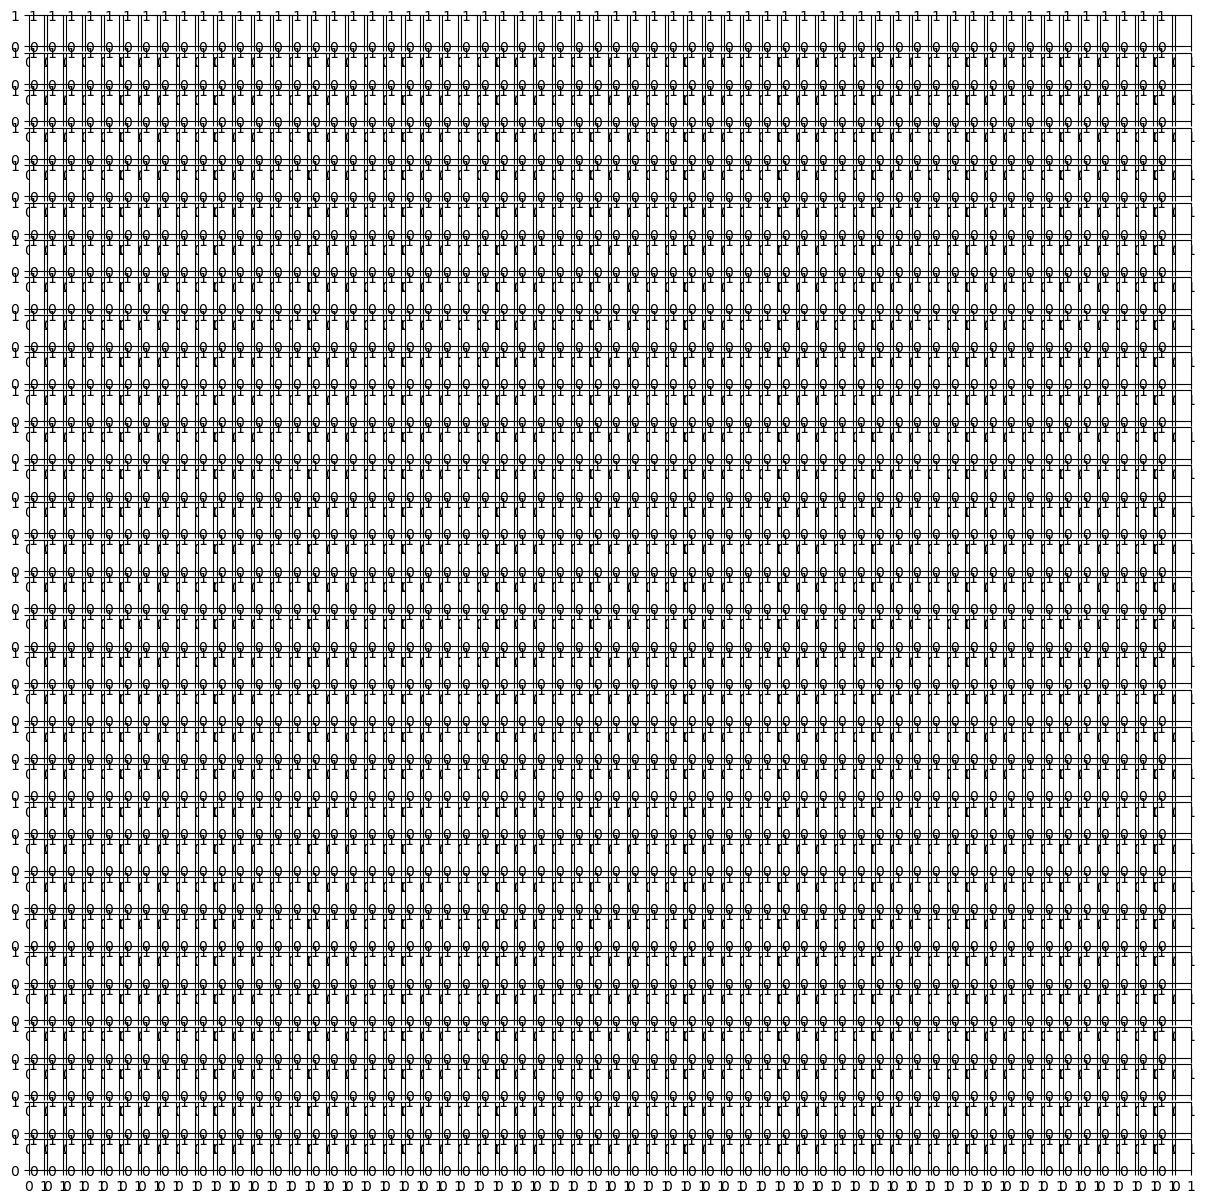

In [27]:
# 计算图像的梯度
grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# 计算梯度的幅值和方向
magnitude = cv2.magnitude(grad_x, grad_y)
angle = cv2.phase(grad_x, grad_y, angleInDegrees=True)

# 设置HOG的方向区间（例如9个区间，每个区间为20度）
bins = np.linspace(0, 180, 10)  # 每20度为一个区间（从0到180度）

# 绘制每个cell的梯度直方图
cell_size = 8  # 每个cell是8x8像素
n_cells_x = gray.shape[1] // cell_size
n_cells_y = gray.shape[0] // cell_size

# 创建一个图像用于显示
fig, axes = plt.subplots(n_cells_y, n_cells_x, figsize=(15, 15))

for y in range(n_cells_y):
    for x in range(n_cells_x):
        # 提取当前cell的梯度信息
        cell_magnitude = magnitude[y*cell_size:(y+1)*cell_size, x*cell_size:(x+1)*cell_size]
        cell_angle = angle[y*cell_size:(y+1)*cell_size, x*cell_size:(x+1)*cell_size]

        # 计算每个区间的频率
        hist, _ = np.histogram(cell_angle, bins=bins, weights=cell_magnitude.flatten())

        # 绘制该cell的直方图
        axes[y, x].bar(bins[:-1], hist, width=20, color='b', align='edge')
        axes[y, x].set_xlim(0, 180)
        axes[y, x].set_ylim(0, np.max(hist))

        # 隐藏坐标轴
        axes[y, x].axis('off')

plt.tight_layout()
plt.show()